Importing pandas library and creating dataframe


In [9]:
import pandas as pd
df_zomato=pd.DataFrame()
df_zomato=pd.read_csv('zomato.csv')


Exploring the data

In [ ]:
df_zomato.head()

In [ ]:


df_zomato.info()
df_zomato.describe()

In [ ]:
df_zomato.isna().sum()

In [ ]:
df_zomato=df_zomato.drop(['url','address','phone','dish_liked','reviews_list','menu_item','dish_liked'],axis=1)

In [ ]:
df_zomato.info()

Drop Duplicates


In [41]:
df_zomato.drop_duplicates(inplace=True)

In [ ]:
df_zomato.shape

Cleaning rate columns and filling with mean values


In [44]:
import numpy as np

In [ ]:
def handlerate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df_zomato['rate']=df_zomato['rate'].apply(handlerate)
df_zomato.head()

In [ ]:
df_zomato.describe()

In [ ]:
df_zomato['rate'].fillna(df_zomato['rate'].mean(),inplace=True)
df_zomato.isna().sum()

Handling approx cost(for two people)


In [54]:
df_zomato['approx_cost(for two people)'] = df_zomato['approx_cost(for two people)'].str.replace(',', '')


In [ ]:
df_zomato['approx_cost(for two people)'] = df_zomato['approx_cost(for two people)'] .astype(float)
df_zomato.describe()


In [ ]:
df_zomato['approx_cost(for two people)'].fillna(df_zomato['approx_cost(for two people)'].median(),inplace=True)
df_zomato['approx_cost(for two people)'].describe()
df_zomato.isna().sum()

Renaming Columns 

In [63]:
df_zomato.rename(columns={'approx_cost(for two people)':'Cost for 2','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

Deciding whether to keep location or city


In [ ]:
print(len(df_zomato['city'].unique()))
print(len(df_zomato['location'].unique()))
#Since there are many locations than city,it is better to drop cities

In [70]:
df_zomato.drop(['city'],axis=1,inplace=True)

In [ ]:
df_zomato.head()

Marking rest_types as others if less than 100


In [ ]:
rest_types=df_zomato['rest_type'].value_counts()



In [ ]:
rest_types_lessthan100=rest_types[rest_types<100]
rest_types_lessthan100

In [137]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for 2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [99]:
def handlevalues(value):
    if value in rest_types_lessthan100:
        return 'others'
    else:
        return value
df_zomato['rest_type']=df_zomato['rest_type'].apply(handlevalues)

In [ ]:
df_zomato['rest_type'].value_counts()

Cleaning Location columns

In [ ]:
location=df_zomato['location'].value_counts(ascending=False)
location

In [ ]:
location_less_than_100=location[location<100]
location_less_than_100

In [109]:
def handlelocation(values):
    if values in location_less_than_100:
        return 'Others'
    else:
        return values
df_zomato['location']=df_zomato['location'].apply(handlelocation)


In [112]:
def handlelocation1(values):
    if values=='others':
        return 'Others'
    else:
        return values
df_zomato['location']=df_zomato['location'].apply(handlelocation1)

In [ ]:
df_zomato.head(10)

Visualizing the data!

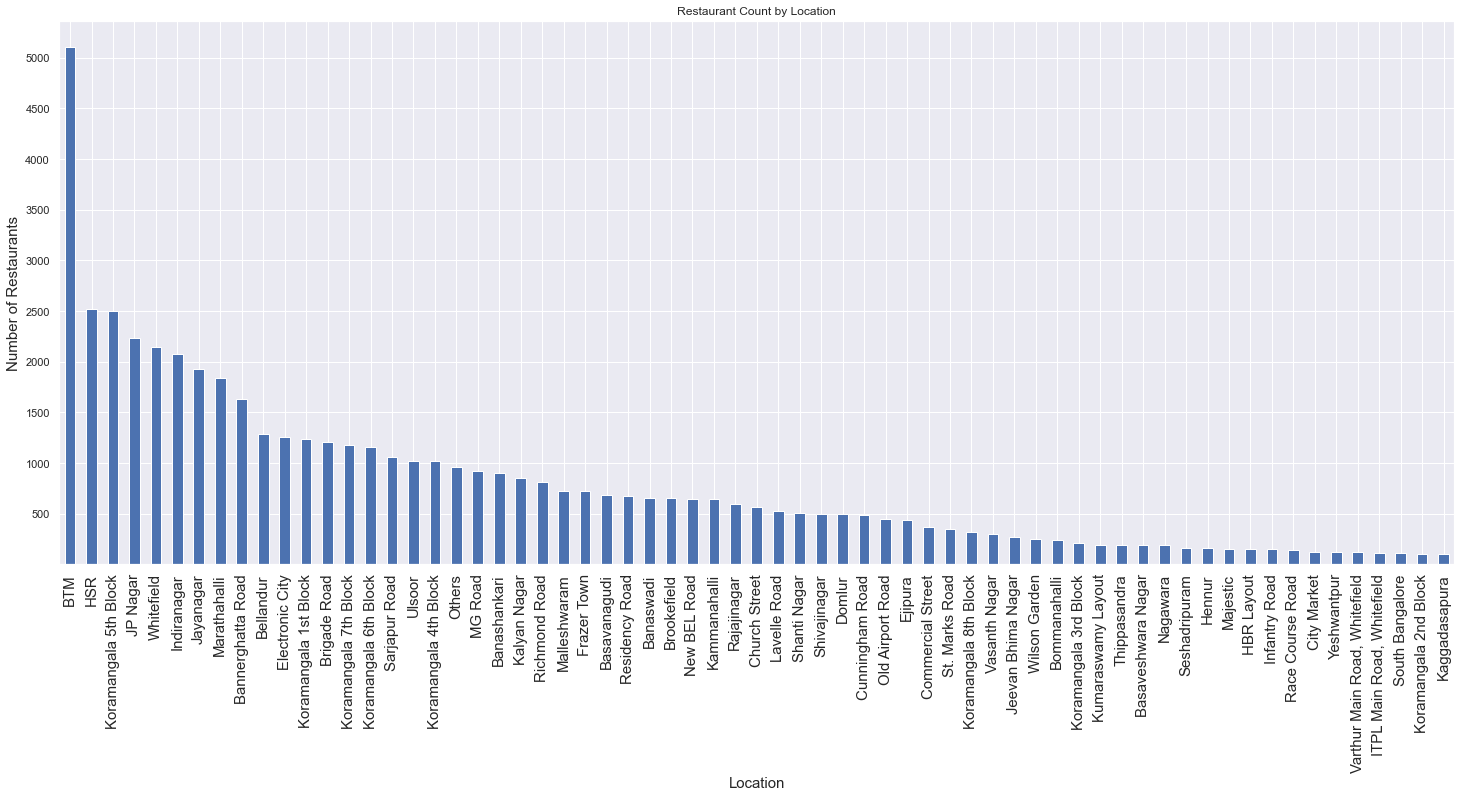

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 10),facecolor='white')
location_counts = df_zomato['location'].value_counts()
location_counts.plot(kind='bar')
plt.xlabel('Location',fontsize=15)
plt.ylabel('Number of Restaurants',fontsize=15)
plt.title('Restaurant Count by Location')
plt.xticks(fontsize=15)
plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.show()

Visualising the cost for two every location


In [145]:
grouped_data = df_zomato.groupby('location')['Cost for 2'].mean()
grouped_data=grouped_data.sort_values(ascending=False)

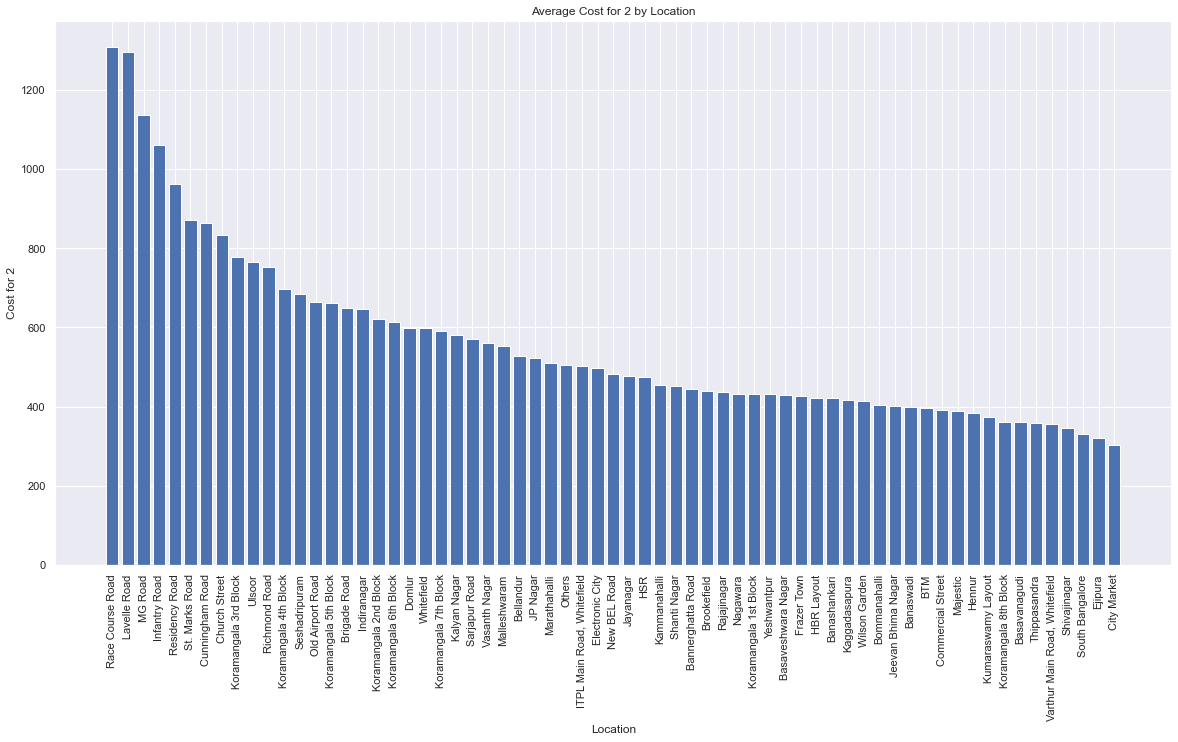

In [146]:
plt.figure(figsize=(20, 10))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Location')
plt.ylabel('Cost for 2')
plt.title('Average Cost for 2 by Location')
plt.xticks(rotation=90)  
plt.show()

Visualising for type of restaurants

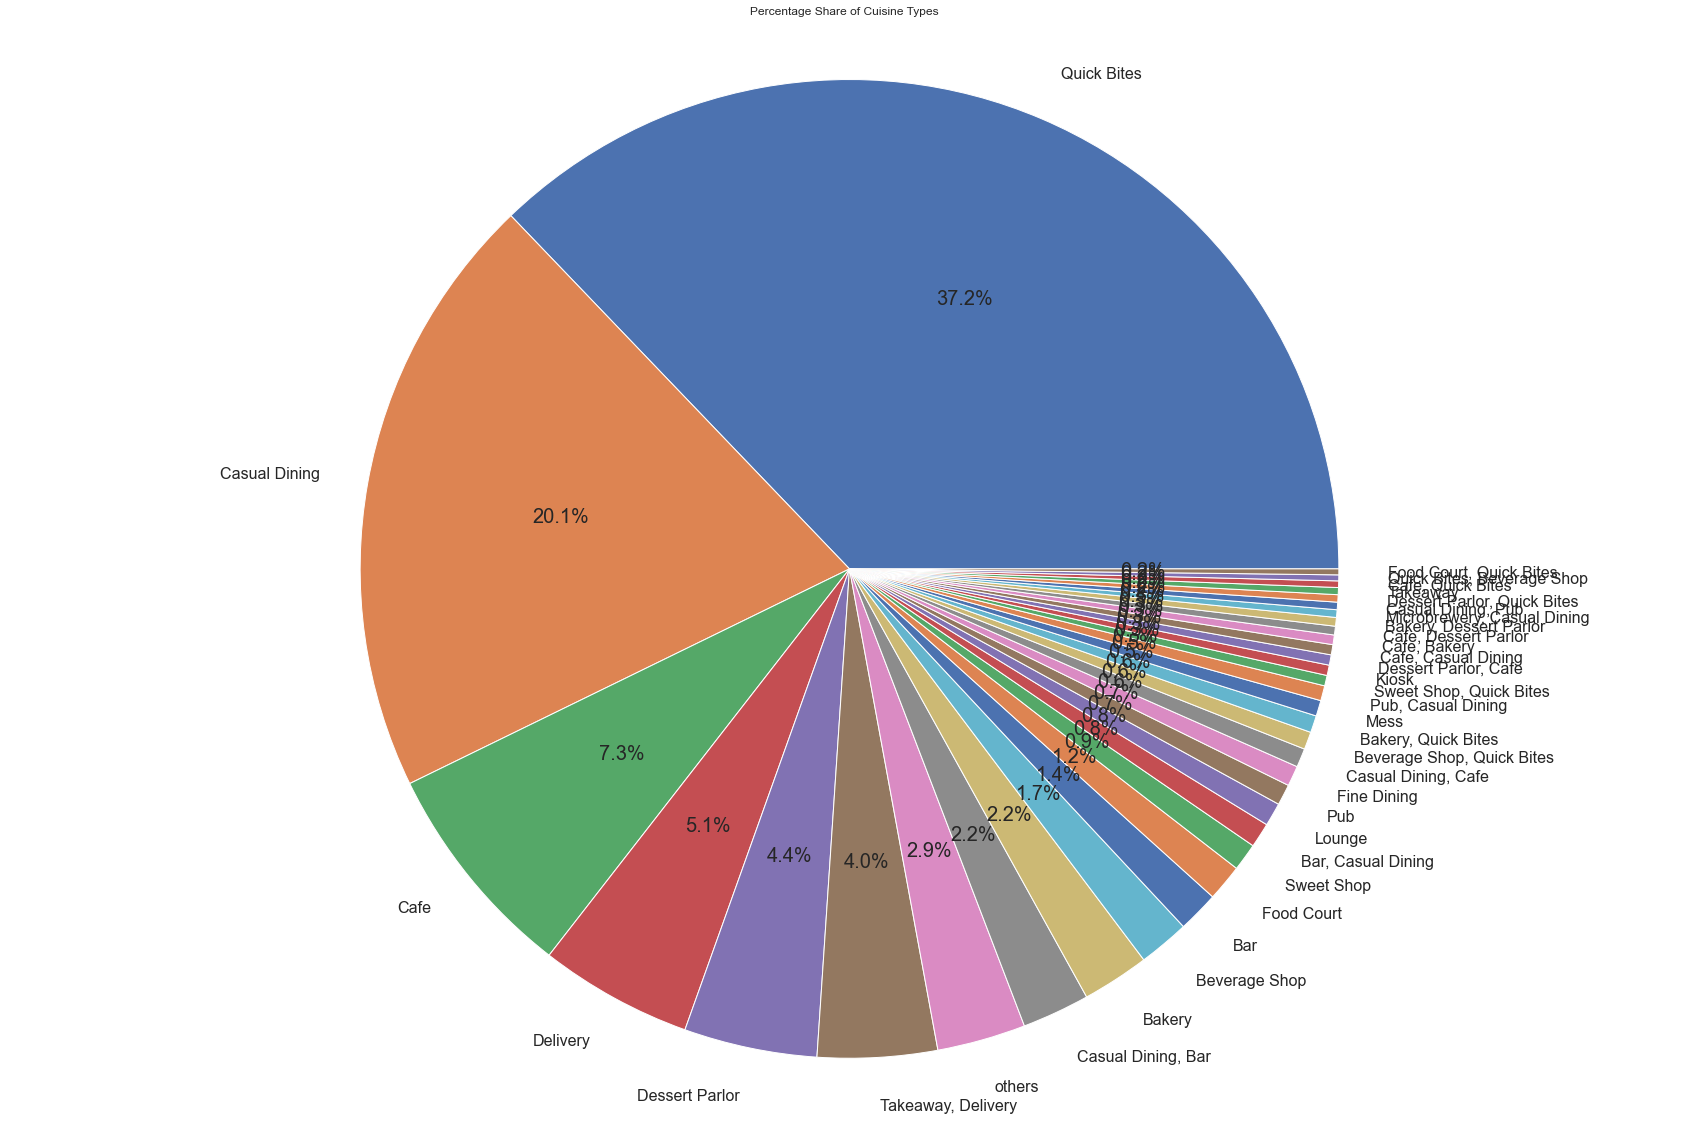

In [159]:

cuisine_counts = df_zomato['rest_type'].value_counts()
plt.figure(figsize=(30,20))
pie=plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Percentage Share of Cuisine Types')
plt.axis('equal')
plt.setp(pie[1], size=16)  
plt.setp(pie[2], size=20)
plt.xticks(rotation=45)
plt.show()


In [160]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for 2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


To see if rating and cost for 2 have a correlation

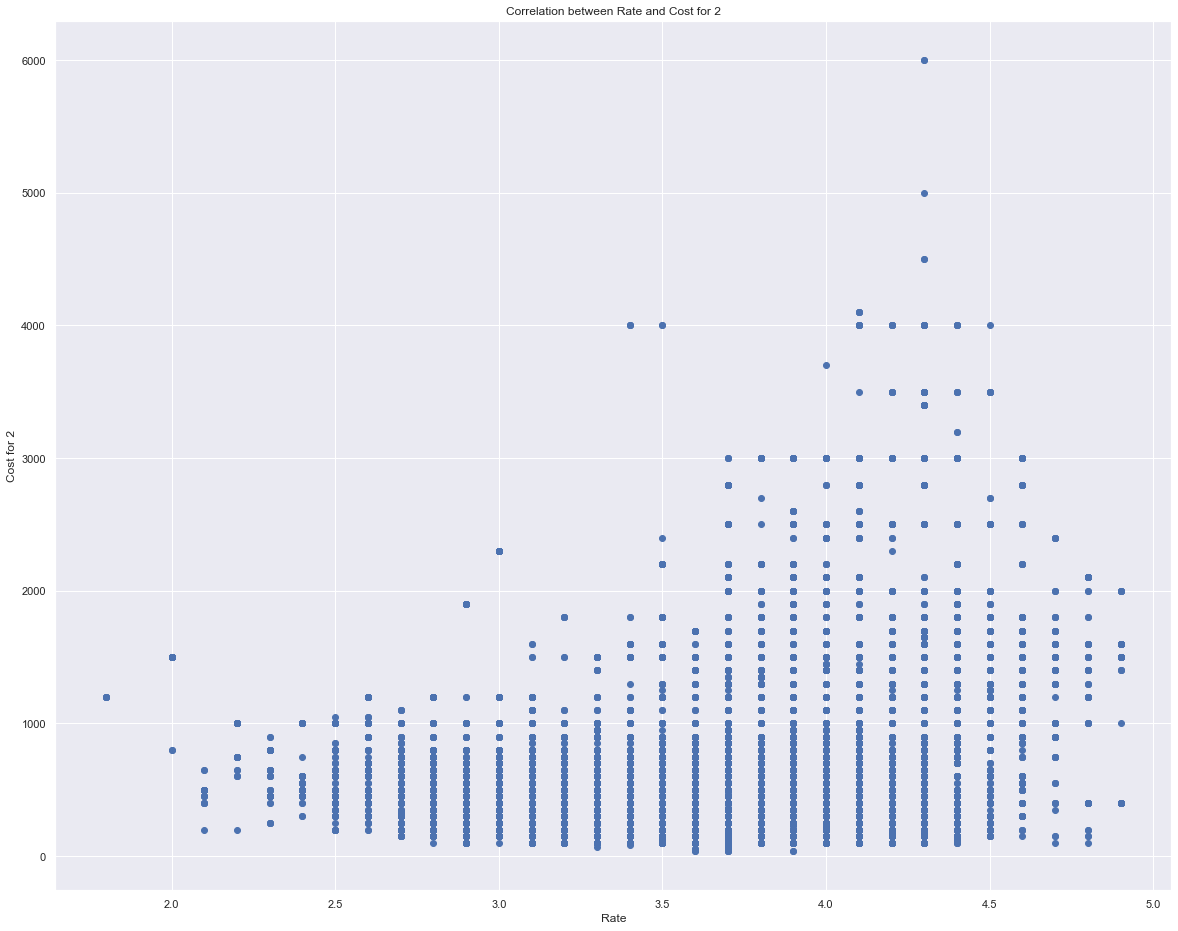

In [161]:
plt.figure(figsize=(20, 16))
plt.scatter(df_zomato['rate'], df_zomato['Cost for 2'])
plt.xlabel('Rate')
plt.ylabel('Cost for 2')
plt.title('Correlation between Rate and Cost for 2')
plt.show()

We can infer that there is no correlation,next we compare how many restaurants have book a table

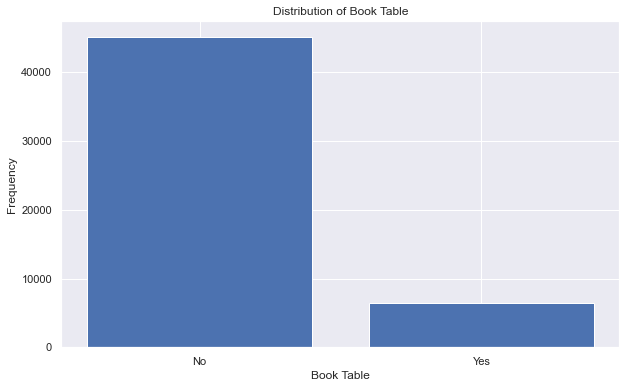

In [163]:

book_table_counts = df_zomato['book_table'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(book_table_counts.index, book_table_counts)
plt.xlabel('Book Table')
plt.ylabel('Frequency')
plt.title('Distribution of Book Table')
plt.show()


Similarly comparing for online ordering

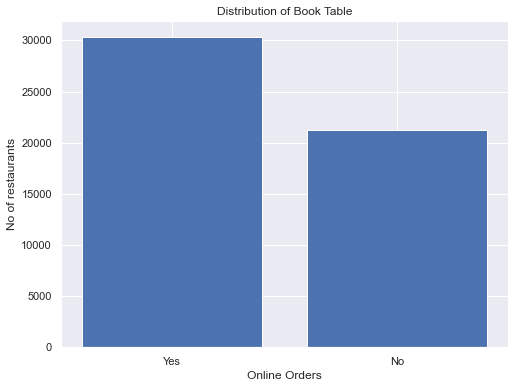

In [164]:

orderonline_counts = df_zomato['online_order'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(orderonline_counts.index, orderonline_counts)
plt.xlabel('Online Orders')
plt.ylabel('No of restaurants')
plt.title('Distribution of Book Table')
plt.show()


Predicting the rating a owner would get if he/she opens a restaurant in BTM with cost for 2 approximately 900

In [166]:
from sklearn.linear_model import LinearRegression
btm_data = df_zomato[df_zomato['location'] == 'BTM']
btm_data



,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for 2,type
879,Sankranthi Veg Restaurant,Yes,No,3.000000,102,BTM,Casual Dining,"South Indian, North Indian, Chinese",600.0,Buffet
921,Hearts Unlock Cafe,No,No,3.200000,11,BTM,Cafe,"Cafe, Healthy Food",500.0,Cafes
922,eat.fit,Yes,No,4.500000,1178,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,Delivery
923,Sai Abhiruchi,Yes,No,3.700000,335,BTM,Casual Dining,"Andhra, North Indian, Biryani",800.0,Delivery
924,Capsicum Family Restaurant,Yes,No,3.800000,254,BTM,Casual Dining,"Biryani, North Indian",800.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
42425,Sweet Truth,Yes,No,4.000000,29,BTM,Bakery,"Bakery, Desserts",500.0,Delivery
42545,Sri Srinivas Park Hotel,Yes,No,3.700142,0,BTM,Quick Bites,"South Indian, Fast Food",300.0,Delivery
45106,Sri Srinivas Park Hotel,Yes,No,3.700142,0,BTM,Quick Bites,"South Indian, Fast Food",300.0,Delivery
47878,The Nourished Kitchen,No,No,3.700142,0,BTM,Delivery,"Asian, Continental, Healthy Food",400.0,Delivery


In [176]:

x = btm_data[['Cost for 2']]#x should always be a dataframe
y = btm_data['rate']



879      3.000000
921      3.200000
922      4.500000
923      3.700000
924      3.800000
           ...   
42425    4.000000
42545    3.700142
45106    3.700142
47878    3.700142
49619    3.700142
Name: rate, Length: 5109, dtype: float64

In [177]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [185]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
predicted_value=model.predict([[900]])
predicted_value=round(predicted_value[0],2)
print(f"Predicted rating will be : {predicted_value}")

Predicted rating will be : 3.7
